<a href="https://colab.research.google.com/github/dhrubjun/Neural_Network/blob/main/neural_network_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, X_test), (y_train, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

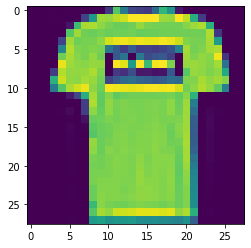

In [4]:
plt.imshow(X_train[1])

In [5]:
X_test[2]

0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sandal')

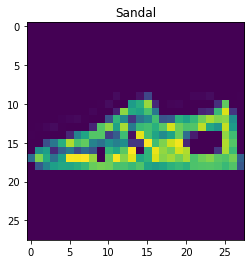

In [7]:
plt.imshow(X_train[201])
plt.title(class_names[X_test[201]])

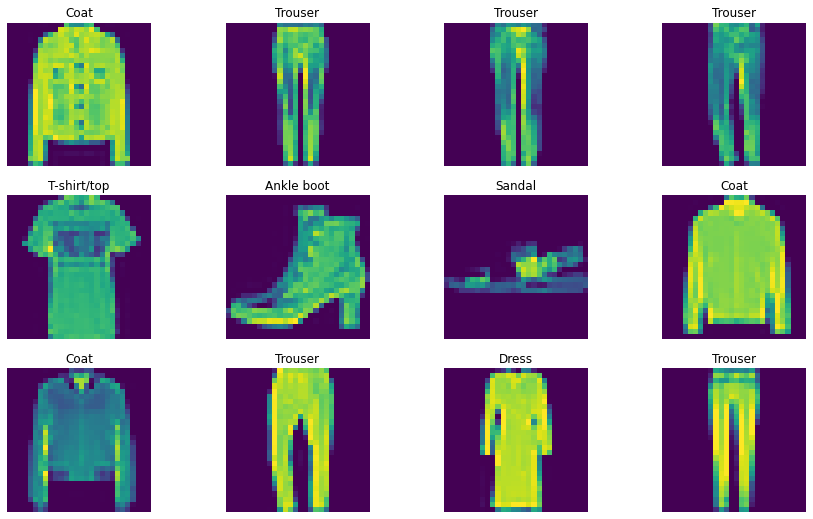

In [8]:
import random
plt.figure(figsize=(15,9))
for i in range(12):
  ax = plt.subplot(3,4,i+1)
  random_num = random.choice(range(len(X_train)))
  plt.imshow(X_train[random_num])
  plt.title(class_names[X_test[random_num]])
  plt.axis(False)

In [9]:
X_train.min(), X_train.max()

(0, 255)

##Normalize the Data

In [10]:
X_train = X_train/255.0
y_train = y_train/255.0

In [11]:
X_train.min(), X_train.max()

(0.0, 1.0)

## Creating the Model

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(tf.expand_dims(X_train, axis=-1), X_test, epochs=50, validation_data=(y_train,y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5796 - accuracy: 0.8003 - val_loss: 0.4699 - val_accuracy: 0.8354
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.8514 - val_loss: 0.4908 - val_accuracy: 0.8348
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3908 - accuracy: 0.8609 - val_loss: 0.4200 - val_accuracy: 0.8517
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.4251 - val_accuracy: 0.8521
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3574 - accuracy: 0.8715 - val_loss: 0.4152 - val_accuracy: 0.8528
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3456 - accuracy: 0.8760 - val_loss: 0.4341 - val_accuracy: 0.8450
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.8780 - val_loss: 0.4284 - val_accuracy:

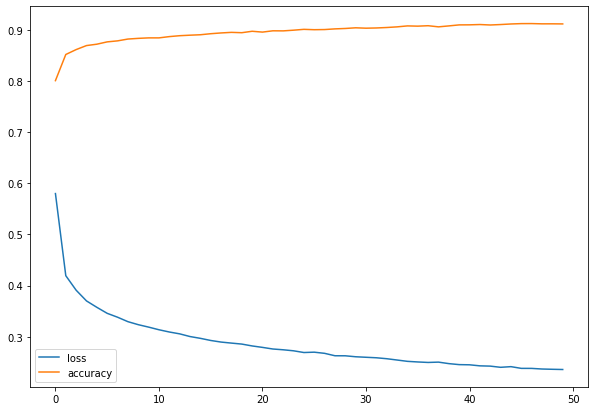

In [18]:
plt.figure(figsize=(10,7))
pd.DataFrame(history.history).loss.plot()
pd.DataFrame(history.history).accuracy.plot()
plt.legend()


In [20]:
y_prob = model.predict(y_train)

In [22]:
y_prob.shape

(10000, 10)

In [27]:
y_prob[1].argmax(), class_names[y_prob[1].argmax()]

(2, 'Pullover')

In [32]:
y_pred = y_prob.argmax(axis=1)

In [33]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [35]:
y_pred.shape

(10000,)

My Prediction : Trouser
Correct Prediction!!!


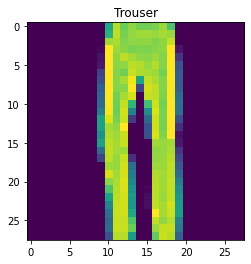

In [48]:
rand_num = random.choice(range(len(y_train)))
plt.imshow(y_train[rand_num])
plt.title(class_names[y_test[rand_num]])
print("My Prediction :", class_names[y_pred[rand_num]])
if y_pred[rand_num]==y_test[rand_num]:
  print("Correct Prediction!!!")
else:
  print("Sorry.. Wrong Prediction")